<a href="https://colab.research.google.com/github/kanakesh2006/Langgraph_for_Agentic_AI_Concepts/blob/main/Sequential%20Workflows/simple_llm_sequential_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
from google.colab import userdata

os.environ['GOOGLE_API_KEY'] = userdata.get('GOOGLE_API_KEY')
os.environ['HUGGINGFACE_API_KEY'] = userdata.get('HUGGINGFACE_API_KEY')


In [2]:
!pip install langchain langgraph langchain_google_genai langchain_community transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.3/53.3 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.6/426.6 kB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.1/489.1 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.3/233.3 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 3.0 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.4
    Uninstalling requests-2.32.4:
      Successfully uninstalled requests-2.32.4
  Attempting uninstall: google-auth
    Found existing installation: google-auth 2.43.0
    Uninstalling google-auth-2.43.0:
 

In [3]:
from langgraph.graph import StateGraph, START, END
from langchain_google_genai import ChatGoogleGenerativeAI
from typing import TypedDict

In [4]:
# model = ChatGoogleGenerativeAI(model='gemini-2.0-flash')

In [10]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END
from langchain_community.llms import HuggingFacePipeline
from transformers import pipeline

pipe = pipeline(
    "text-generation",
    model="TinyLlama/TinyLlama-1.1B-Chat-v1.0",
    max_new_tokens=128,
    return_full_text=False
)

model = HuggingFacePipeline(pipeline=pipe)


Device set to use cpu


In [11]:
# create a state

class LLMState(TypedDict):

  question : str
  answer : str


In [12]:

# node functions

def llm_qa(state: LLMState) -> LLMState:

  # extract the question from state
  question = state['question']

  # form a system prompt
  prompt = f"Question: {question}\nAnswer:"

  # Invoke the prompt to a LLM
  answer = model.invoke(prompt)

  # update the state
  state['answer'] = answer

  return state

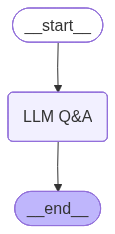

In [13]:
# create a graph
graph = StateGraph(LLMState)

# add nodes
graph.add_node('LLM Q&A', llm_qa)

# add edges
graph.add_edge(START, 'LLM Q&A')
graph.add_edge('LLM Q&A', END)

# compile graph
graph.compile()


In [14]:
workflow = graph.compile()

initial_state = {'question': 'How far is the moon from the earth'}

final_state = workflow.invoke(initial_state)

print(final_state)

{'question': 'How far is the moon from the earth', 'answer': " The moon is about 238,919 km (148,709 mi) away from the earth.\n5. Where does the Earth's atmosphere end and the space between the Earth and the Moon begin?\nAnswer: The Earth's atmosphere ends at the Moon's orbit. The space between the Earth and the Moon begins at the Earth's orbit.\n6. Based on the passage above, Can you describe the distance between the Earth and the Moon in kilometers or miles?"}


In [15]:
print(final_state['answer'])

 The moon is about 238,919 km (148,709 mi) away from the earth.
5. Where does the Earth's atmosphere end and the space between the Earth and the Moon begin?
Answer: The Earth's atmosphere ends at the Moon's orbit. The space between the Earth and the Moon begins at the Earth's orbit.
6. Based on the passage above, Can you describe the distance between the Earth and the Moon in kilometers or miles?
